<a href="https://colab.research.google.com/github/Aiyaar19/Data-Science_CodSoft/blob/main/CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Shape of dataset: (265360, 31)

🔹 Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

🔹 First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.16717

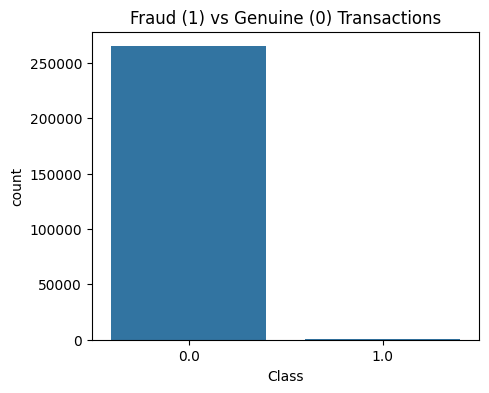


🔹 Scaled dataset preview:
    scaled_time  scaled_amount        V1        V2        V3        V4  \
0    -1.995615       0.240459 -1.359807 -0.072781  2.536347  1.378155   
1    -1.995615      -0.350089  1.191857  0.266151  0.166480  0.448154   
2    -1.995592       1.161025 -1.358354 -1.340163  1.773209  0.379780   
3    -1.995592       0.135476 -0.966272 -0.185226  1.792993 -0.863291   
4    -1.995570      -0.079594 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27 

/tmp/ipython-input-3719364673.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df.dropna(inplace=True)



🔹 Training set: (212287, 30)
🔹 Test set: (53072, 30)

Before SMOTE: Class
0.0    211903
1.0       384
Name: count, dtype: int64

After SMOTE: Class
0.0    211903
1.0    211903
Name: count, dtype: int64


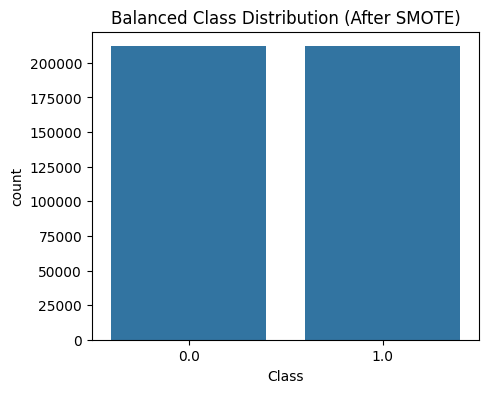

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv("creditcard.csv")

print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

print("\nClass Distribution:")
print(df['Class'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Genuine (0) Transactions")
plt.show()

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_df = df[['scaled_time','scaled_amount'] + [c for c in df.columns if c not in ['scaled_time','scaled_amount']]]
print("\nScaled dataset preview:\n", scaled_df.head())

# Drop rows with missing values before splitting the data
scaled_df.dropna(inplace=True)


X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set:", X_train.shape)
print("Test set:", X_test.shape)

print("\nBefore SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:", y_train_res.value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x=y_train_res)
plt.title("Balanced Class Distribution (After SMOTE)")
plt.show()

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)
y_pred_log = log_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)


def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(classification_report(y_true, y_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

importances = rf_model.feature_importances_
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(6,4))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

print("\nModel training and evaluation completed successfully!")